In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('train.csv')

In [3]:
dataset

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train=np.array(dataset.drop(['label'],axis=1))
Y_train=np.array(dataset['label'])

In [5]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [6]:
Y_train

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [7]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [8]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_train=X_train.astype('float32')
X_train=X_train/255

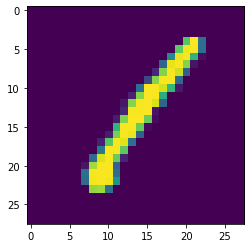

In [9]:
plt.figure()
plt.imshow(X_train[0][:,:,0])

In [10]:
import tensorflow as tf

In [11]:
X_train.shape

(42000, 28, 28, 1)

In [12]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),padding='same',activation=tf.nn.relu,input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [13]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
             )

In [14]:
model.fit(X_train,Y_train,epochs=18,batch_size=32)

Train on 42000 samples
Epoch 1/20
42000/42000 [==============================] - 36s 860us/sample - loss: 0.1306 - acc: 0.9591
Epoch 2/20
42000/42000 [==============================] - 33s 793us/sample - loss: 0.0416 - acc: 0.9871
Epoch 3/20
42000/42000 [==============================] - 35s 831us/sample - loss: 0.0274 - acc: 0.9912
Epoch 4/20
42000/42000 [==============================] - 33s 789us/sample - loss: 0.0208 - acc: 0.9929
Epoch 5/20
42000/42000 [==============================] - 33s 791us/sample - loss: 0.0147 - acc: 0.9950
Epoch 6/20
42000/42000 [==============================] - 33s 786us/sample - loss: 0.0108 - acc: 0.9965
Epoch 7/20
42000/42000 [==============================] - 34s 798us/sample - loss: 0.0100 - acc: 0.9967
Epoch 8/20
42000/42000 [==============================] - 34s 811us/sample - loss: 0.0088 - acc: 0.9970
Epoch 9/20
42000/42000 [==============================] - 35s 822us/sample - loss: 0.0073 - acc: 0.9975
Epoch 10/20
42000/42000 [================

In [15]:
test_df=pd.read_csv('test.csv')

In [16]:
X_test=np.array(test_df)

In [17]:
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [18]:
X_test=X_test.astype('float32')

In [19]:
X_test/=255

In [20]:
predictions=model.predict(X_test)

In [21]:
predictions[0]

array([3.6704419e-15, 2.2349318e-15, 1.0000000e+00, 3.1773373e-12,
       1.5722762e-11, 4.8538579e-21, 4.2533164e-18, 3.2485492e-13,
       6.3542656e-12, 8.6034980e-14], dtype=float32)

In [22]:
np.argmax(predictions[10])

5

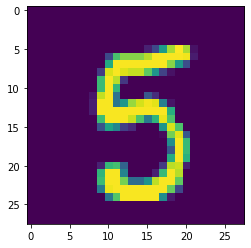

In [23]:
plt.figure()
plt.imshow(X_test[10][:,:,0])

In [24]:
X_test.shape

(28000, 28, 28, 1)

In [25]:
predictions.shape

(28000, 10)

In [26]:
results=[]

In [27]:
for i in range(28000):
    results.append(np.argmax(predictions[i]))
    

In [28]:
results[4]

3

In [29]:
results=pd.Series(results,name="Label")

In [30]:
results

0        2
1        0
2        9
3        9
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

In [31]:
submission=pd.concat([pd.Series(range(1,28001),name="ImageId"),results],axis=1)

In [32]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [34]:
submission.to_csv('my_submissions4',index=False)

In [35]:
my_sub=pd.read_csv('my_submissions4')

In [36]:
my_sub

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
